In [88]:
import matplotlib.pyplot as plt
from collections import defaultdict
plt.rcParams["figure.figsize"] = (20,10)


In [18]:
resnet_50_log = """
     1  train Loss: 1.7434 Acc: 0.4768
     2  val Loss: 1.5059 Acc: 0.5227
     3  train Loss: 1.3484 Acc: 0.5338
     4  val Loss: 1.1898 Acc: 0.5676
     5  train Loss: 1.1348 Acc: 0.5929
     6  val Loss: 1.0318 Acc: 0.6504
     7  train Loss: 1.0181 Acc: 0.6512
     8  val Loss: 0.9492 Acc: 0.6718
     9  train Loss: 0.9400 Acc: 0.6878
    10  val Loss: 0.8943 Acc: 0.6872
    11  train Loss: 0.8995 Acc: 0.6959
    12  val Loss: 0.8622 Acc: 0.6992
    13  train Loss: 0.8576 Acc: 0.7134
    14  val Loss: 0.8234 Acc: 0.7149
    15  train Loss: 0.8296 Acc: 0.7246
    16  val Loss: 0.7994 Acc: 0.7218
    17  train Loss: 0.7961 Acc: 0.7357
    18  val Loss: 0.7763 Acc: 0.7341
    19  train Loss: 0.7792 Acc: 0.7378
    20  val Loss: 0.7630 Acc: 0.7364
    21  train Loss: 0.7577 Acc: 0.7447
    22  val Loss: 0.7616 Acc: 0.7372
    23  train Loss: 0.7517 Acc: 0.7437
    24  val Loss: 0.7412 Acc: 0.7435
    25  train Loss: 0.7283 Acc: 0.7562
    26  val Loss: 0.7212 Acc: 0.7506
    27  train Loss: 0.7183 Acc: 0.7550
    28  val Loss: 0.7185 Acc: 0.7486
    29  train Loss: 0.7176 Acc: 0.7597
    30  val Loss: 0.6971 Acc: 0.7566
    31  train Loss: 0.6976 Acc: 0.7625
    32  val Loss: 0.7024 Acc: 0.7598
    33  train Loss: 0.6960 Acc: 0.7639
    34  val Loss: 0.7025 Acc: 0.7549
    35  train Loss: 0.6896 Acc: 0.7599
    36  val Loss: 0.6928 Acc: 0.7538
    37  train Loss: 0.6776 Acc: 0.7682
    38  val Loss: 0.6723 Acc: 0.7635
    39  train Loss: 0.6736 Acc: 0.7678
    40  val Loss: 0.6697 Acc: 0.7661
    41  train Loss: 0.6605 Acc: 0.7762
    42  val Loss: 0.6689 Acc: 0.7638
    43  train Loss: 0.6557 Acc: 0.7775
    44  val Loss: 0.6649 Acc: 0.7721
    45  train Loss: 0.6612 Acc: 0.7705
    46  val Loss: 0.6570 Acc: 0.7795
    47  train Loss: 0.6440 Acc: 0.7828
    48  val Loss: 0.6425 Acc: 0.7823
    49  train Loss: 0.6394 Acc: 0.7794
    50  val Loss: 0.6403 Acc: 0.7769
    51  train Loss: 0.6273 Acc: 0.7846
    52  val Loss: 0.6453 Acc: 0.7775
    53  train Loss: 0.6358 Acc: 0.7836
    54  val Loss: 0.6394 Acc: 0.7795
    55  train Loss: 0.6209 Acc: 0.7875
    56  val Loss: 0.6381 Acc: 0.7806
    57  train Loss: 0.6321 Acc: 0.7839
    58  val Loss: 0.6450 Acc: 0.7763
    59  train Loss: 0.6289 Acc: 0.7817
    60  val Loss: 0.6265 Acc: 0.7866
    61  train Loss: 0.6204 Acc: 0.7853
    62  val Loss: 0.6231 Acc: 0.7875
    63  train Loss: 0.6113 Acc: 0.7897
    64  val Loss: 0.6290 Acc: 0.7841
    65  train Loss: 0.6134 Acc: 0.7880
    66  val Loss: 0.6225 Acc: 0.7858
    67  train Loss: 0.6091 Acc: 0.7883
    68  val Loss: 0.6126 Acc: 0.7912
    69  train Loss: 0.6117 Acc: 0.7864
    70  val Loss: 0.6069 Acc: 0.7935
    71  train Loss: 0.6112 Acc: 0.7905
    72  val Loss: 0.6114 Acc: 0.7909
    73  train Loss: 0.6059 Acc: 0.7862
    74  val Loss: 0.6128 Acc: 0.7886
    75  train Loss: 0.5998 Acc: 0.7935
    76  val Loss: 0.6022 Acc: 0.7981
    77  train Loss: 0.6008 Acc: 0.7961
    78  val Loss: 0.6034 Acc: 0.7943
    79  train Loss: 0.5896 Acc: 0.7979
    80  val Loss: 0.5989 Acc: 0.7923
    81  train Loss: 0.5933 Acc: 0.7941
    82  val Loss: 0.6055 Acc: 0.7898
    83  train Loss: 0.5849 Acc: 0.7993
    84  val Loss: 0.5983 Acc: 0.7941
    85  train Loss: 0.5916 Acc: 0.7965
    86  val Loss: 0.5981 Acc: 0.7901
    87  train Loss: 0.5832 Acc: 0.7932
    88  val Loss: 0.5945 Acc: 0.7963
    89  train Loss: 0.5815 Acc: 0.8011
    90  val Loss: 0.5989 Acc: 0.7929
    91  train Loss: 0.5776 Acc: 0.8034
    92  val Loss: 0.5945 Acc: 0.7958
    93  train Loss: 0.5808 Acc: 0.8005
    94  val Loss: 0.5925 Acc: 0.7955
    95  train Loss: 0.5720 Acc: 0.8014
    96  val Loss: 0.5813 Acc: 0.7986
    97  train Loss: 0.5722 Acc: 0.8045
    98  val Loss: 0.5785 Acc: 0.8021
    99  train Loss: 0.5726 Acc: 0.8034
   100  val Loss: 0.5955 Acc: 0.7946
   101  train Loss: 0.5714 Acc: 0.8014
   102  val Loss: 0.5839 Acc: 0.7986
   103  train Loss: 0.5785 Acc: 0.8019
   104  val Loss: 0.5734 Acc: 0.8058
   105  train Loss: 0.5636 Acc: 0.8025
   106  val Loss: 0.5710 Acc: 0.8066
   107  train Loss: 0.5647 Acc: 0.8061
   108  val Loss: 0.5759 Acc: 0.7995
   109  train Loss: 0.5671 Acc: 0.8045
   110  val Loss: 0.5850 Acc: 0.7946
   111  train Loss: 0.5658 Acc: 0.8084
   112  val Loss: 0.5810 Acc: 0.7958
   113  train Loss: 0.5663 Acc: 0.8037
   114  val Loss: 0.5802 Acc: 0.8015
   115  train Loss: 0.5688 Acc: 0.8000
   116  val Loss: 0.5750 Acc: 0.8035
   117  train Loss: 0.5614 Acc: 0.8081
   118  val Loss: 0.5745 Acc: 0.8012
   119  train Loss: 0.5503 Acc: 0.8072
   120  val Loss: 0.5653 Acc: 0.8078
   121  train Loss: 0.5576 Acc: 0.8110
   122  val Loss: 0.5694 Acc: 0.8026
   123  train Loss: 0.5515 Acc: 0.8098
   124  val Loss: 0.5774 Acc: 0.8018
   125  train Loss: 0.5643 Acc: 0.8080
   126  val Loss: 0.5784 Acc: 0.7969
   127  train Loss: 0.5477 Acc: 0.8120
   128  val Loss: 0.5673 Acc: 0.8075
   129  train Loss: 0.5585 Acc: 0.8073
   130  val Loss: 0.5596 Acc: 0.8112
   131  train Loss: 0.5435 Acc: 0.8106
   132  val Loss: 0.5627 Acc: 0.8069
   133  train Loss: 0.5462 Acc: 0.8113
   134  val Loss: 0.5557 Acc: 0.8118
   135  train Loss: 0.5497 Acc: 0.8105
   136  val Loss: 0.5671 Acc: 0.8015
   137  train Loss: 0.5477 Acc: 0.8090
   138  val Loss: 0.5607 Acc: 0.8075
   139  train Loss: 0.5495 Acc: 0.8094
   140  val Loss: 0.5627 Acc: 0.8063
   141  train Loss: 0.5540 Acc: 0.8103
   142  val Loss: 0.5646 Acc: 0.8043
   143  train Loss: 0.5453 Acc: 0.8114
   144  val Loss: 0.5775 Acc: 0.7966
   145  train Loss: 0.5348 Acc: 0.8175
   146  val Loss: 0.5767 Acc: 0.7995
   147  train Loss: 0.5514 Acc: 0.8085
   148  val Loss: 0.5834 Acc: 0.7941
   149  train Loss: 0.5403 Acc: 0.8119
   150  val Loss: 0.5545 Acc: 0.8126
   151  train Loss: 0.5433 Acc: 0.8129
   152  val Loss: 0.5514 Acc: 0.8121
   153  train Loss: 0.5309 Acc: 0.8175
   154  val Loss: 0.5531 Acc: 0.8072
   155  train Loss: 0.5334 Acc: 0.8185
   156  val Loss: 0.5502 Acc: 0.8126
   157  train Loss: 0.5281 Acc: 0.8199
   158  val Loss: 0.5574 Acc: 0.8072
   159  train Loss: 0.5368 Acc: 0.8139
   160  val Loss: 0.5482 Acc: 0.8183
   161  train Loss: 0.5419 Acc: 0.8133
   162  val Loss: 0.5481 Acc: 0.8143
   163  train Loss: 0.5309 Acc: 0.8162
   164  val Loss: 0.5445 Acc: 0.8166
   165  train Loss: 0.5319 Acc: 0.8185
   166  val Loss: 0.5481 Acc: 0.8126
   167  train Loss: 0.5297 Acc: 0.8159
   168  val Loss: 0.5561 Acc: 0.8069
   169  train Loss: 0.5396 Acc: 0.8141
   170  val Loss: 0.5710 Acc: 0.8009
   171  train Loss: 0.5386 Acc: 0.8125
   172  val Loss: 0.5571 Acc: 0.8081
   173  train Loss: 0.5310 Acc: 0.8193
   174  val Loss: 0.5547 Acc: 0.8115
   175  train Loss: 0.5267 Acc: 0.8181
   176  val Loss: 0.5421 Acc: 0.8135
   177  train Loss: 0.5287 Acc: 0.8198
   178  val Loss: 0.5437 Acc: 0.8112
   179  train Loss: 0.5297 Acc: 0.8213
   180  val Loss: 0.5596 Acc: 0.8015
   181  train Loss: 0.5313 Acc: 0.8157
   182  val Loss: 0.5610 Acc: 0.8018
   183  train Loss: 0.5169 Acc: 0.8199
   184  val Loss: 0.5483 Acc: 0.8129
   185  train Loss: 0.5328 Acc: 0.8171
   186  val Loss: 0.5469 Acc: 0.8135
   187  train Loss: 0.5195 Acc: 0.8234
   188  val Loss: 0.5325 Acc: 0.8195
   189  train Loss: 0.5224 Acc: 0.8232
   190  val Loss: 0.5346 Acc: 0.8163
   191  train Loss: 0.5195 Acc: 0.8194
   192  val Loss: 0.5603 Acc: 0.7998
   193  train Loss: 0.5234 Acc: 0.8239
   194  val Loss: 0.5699 Acc: 0.8006
   195  train Loss: 0.5228 Acc: 0.8187
   196  val Loss: 0.5389 Acc: 0.8146
   197  train Loss: 0.5201 Acc: 0.8178
   198  val Loss: 0.5337 Acc: 0.8229
   199  train Loss: 0.5219 Acc: 0.8170
   200  val Loss: 0.5307 Acc: 0.8229
"""

In [19]:
#without LR decay
resnet_101_log = """
     1  train Loss: 1.8451 Acc: 0.4686
     2  val Loss: 1.5625 Acc: 0.5421
     3  train Loss: 1.3869 Acc: 0.5312
     4  val Loss: 1.1939 Acc: 0.5958
     5  train Loss: 1.1588 Acc: 0.6001
     6  val Loss: 1.0264 Acc: 0.6390
     7  train Loss: 1.0158 Acc: 0.6563
     8  val Loss: 0.9289 Acc: 0.6838
     9  train Loss: 0.9300 Acc: 0.6915
    10  val Loss: 0.8597 Acc: 0.7092
    11  train Loss: 0.8810 Acc: 0.7061
    12  val Loss: 0.8163 Acc: 0.7298
    13  train Loss: 0.8331 Acc: 0.7232
    14  val Loss: 0.7914 Acc: 0.7304
    15  train Loss: 0.8004 Acc: 0.7355
    16  val Loss: 0.7683 Acc: 0.7375
    17  train Loss: 0.7804 Acc: 0.7361
    18  val Loss: 0.7371 Acc: 0.7492
    19  train Loss: 0.7590 Acc: 0.7473
    20  val Loss: 0.7189 Acc: 0.7621
    21  train Loss: 0.7286 Acc: 0.7597
    22  val Loss: 0.7070 Acc: 0.7581
    23  train Loss: 0.7282 Acc: 0.7570
    24  val Loss: 0.7021 Acc: 0.7558
    25  train Loss: 0.7107 Acc: 0.7630
    26  val Loss: 0.6832 Acc: 0.7658
    27  train Loss: 0.6866 Acc: 0.7715
    28  val Loss: 0.6649 Acc: 0.7821
    29  train Loss: 0.6794 Acc: 0.7732
    30  val Loss: 0.6617 Acc: 0.7741
    31  train Loss: 0.6744 Acc: 0.7697
    32  val Loss: 0.6565 Acc: 0.7763
    33  train Loss: 0.6634 Acc: 0.7753
    34  val Loss: 0.6409 Acc: 0.7858
    35  train Loss: 0.6524 Acc: 0.7782
    36  val Loss: 0.6303 Acc: 0.7906
    37  train Loss: 0.6525 Acc: 0.7814
    38  val Loss: 0.6272 Acc: 0.7921
    39  train Loss: 0.6427 Acc: 0.7837
    40  val Loss: 0.6193 Acc: 0.7943
    41  train Loss: 0.6332 Acc: 0.7853
    42  val Loss: 0.6313 Acc: 0.7852
    43  train Loss: 0.6304 Acc: 0.7855
    44  val Loss: 0.6097 Acc: 0.7941
    45  train Loss: 0.6185 Acc: 0.7904
    46  val Loss: 0.6034 Acc: 0.7926
    47  train Loss: 0.6202 Acc: 0.7860
    48  val Loss: 0.6074 Acc: 0.7901
    49  train Loss: 0.6072 Acc: 0.7938
    50  val Loss: 0.5901 Acc: 0.8043
    51  train Loss: 0.6067 Acc: 0.7989
    52  val Loss: 0.5983 Acc: 0.7972
    53  train Loss: 0.6119 Acc: 0.7918
    54  val Loss: 0.6058 Acc: 0.7955
    55  train Loss: 0.5952 Acc: 0.7974
    56  val Loss: 0.6057 Acc: 0.7978
    57  train Loss: 0.5891 Acc: 0.8002
    58  val Loss: 0.5875 Acc: 0.8032
    59  train Loss: 0.5924 Acc: 0.7974
    60  val Loss: 0.5845 Acc: 0.8063
    61  train Loss: 0.5814 Acc: 0.7977
    62  val Loss: 0.5752 Acc: 0.8118
    63  train Loss: 0.5886 Acc: 0.7989
    64  val Loss: 0.5684 Acc: 0.8118
    65  train Loss: 0.5798 Acc: 0.8033
    66  val Loss: 0.5715 Acc: 0.8043
    67  train Loss: 0.5788 Acc: 0.8005
    68  val Loss: 0.5691 Acc: 0.8061
    69  train Loss: 0.5841 Acc: 0.7980
    70  val Loss: 0.5629 Acc: 0.8072
    71  train Loss: 0.5728 Acc: 0.8056
    72  val Loss: 0.5596 Acc: 0.8098
    73  train Loss: 0.5682 Acc: 0.8076
    74  val Loss: 0.5736 Acc: 0.7995
    75  train Loss: 0.5660 Acc: 0.8086
    76  val Loss: 0.5658 Acc: 0.8072
    77  train Loss: 0.5660 Acc: 0.8083
    78  val Loss: 0.5745 Acc: 0.8029
    79  train Loss: 0.5556 Acc: 0.8104
    80  val Loss: 0.5817 Acc: 0.7955
    81  train Loss: 0.5601 Acc: 0.8074
    82  val Loss: 0.5770 Acc: 0.8018
    83  train Loss: 0.5626 Acc: 0.8077
    84  val Loss: 0.5505 Acc: 0.8152
    85  train Loss: 0.5511 Acc: 0.8097
    86  val Loss: 0.5419 Acc: 0.8163
    87  train Loss: 0.5515 Acc: 0.8150
    88  val Loss: 0.5468 Acc: 0.8158
    89  train Loss: 0.5524 Acc: 0.8115
    90  val Loss: 0.5466 Acc: 0.8141
    91  train Loss: 0.5440 Acc: 0.8142
    92  val Loss: 0.5461 Acc: 0.8132
    93  train Loss: 0.5469 Acc: 0.8107
    94  val Loss: 0.5582 Acc: 0.8083
    95  train Loss: 0.5408 Acc: 0.8156
    96  val Loss: 0.5515 Acc: 0.8109
    97  train Loss: 0.5445 Acc: 0.8108
    98  val Loss: 0.5434 Acc: 0.8132
    99  train Loss: 0.5517 Acc: 0.8117
   100  val Loss: 0.5538 Acc: 0.8075
   101  train Loss: 0.5451 Acc: 0.8108
   102  val Loss: 0.5457 Acc: 0.8098
   103  train Loss: 0.5387 Acc: 0.8156
   104  val Loss: 0.5335 Acc: 0.8155
   105  train Loss: 0.5359 Acc: 0.8186
   106  val Loss: 0.5386 Acc: 0.8123
   107  train Loss: 0.5323 Acc: 0.8176
   108  val Loss: 0.5334 Acc: 0.8161
   109  train Loss: 0.5252 Acc: 0.8214
   110  val Loss: 0.5437 Acc: 0.8081
   111  train Loss: 0.5284 Acc: 0.8183
   112  val Loss: 0.5307 Acc: 0.8149
   113  train Loss: 0.5276 Acc: 0.8167
   114  val Loss: 0.5444 Acc: 0.8072
"""

In [20]:
#with LR decay, starting at .1
resnet_101_decay_from_1_log = """
     1  train Loss: 62.4884 Acc: 0.2329
     2  val Loss: 104.8674 Acc: 0.5256
     3  train Loss: 90.2681 Acc: 0.4840
     4  val Loss: 33.7224 Acc: 0.5079
     5  train Loss: 23.0439 Acc: 0.4719
     6  val Loss: 27.9012 Acc: 0.5667
     7  train Loss: 15.0812 Acc: 0.5988
     8  val Loss: 8.2179 Acc: 0.6561
     9  train Loss: 7.9663 Acc: 0.6373
    10  val Loss: 6.5718 Acc: 0.7218
    11  train Loss: 4.6217 Acc: 0.7135
    12  val Loss: 4.0871 Acc: 0.7618
    13  train Loss: 3.3017 Acc: 0.7430
    14  val Loss: 3.2823 Acc: 0.7566
    15  train Loss: 2.6604 Acc: 0.7566
    16  val Loss: 2.5479 Acc: 0.7803
    17  train Loss: 2.1292 Acc: 0.7714
    18  val Loss: 2.0835 Acc: 0.7949
    19  train Loss: 1.8113 Acc: 0.7738
    20  val Loss: 1.8066 Acc: 0.7929
    21  train Loss: 1.5650 Acc: 0.7798
    22  val Loss: 1.6038 Acc: 0.7901
    23  train Loss: 1.3914 Acc: 0.7874
    24  val Loss: 2.0365 Acc: 0.7652
    25  train Loss: 1.3337 Acc: 0.7812
    26  val Loss: 1.7345 Acc: 0.7812
    27  train Loss: 1.2333 Acc: 0.7794
    28  val Loss: 1.3449 Acc: 0.7749
    29  train Loss: 1.4010 Acc: 0.7587
    30  val Loss: 1.6727 Acc: 0.7749
    31  train Loss: 2.2380 Acc: 0.7472
    32  val Loss: 4.0504 Acc: 0.6335
    33  train Loss: 2.1693 Acc: 0.7093
    34  val Loss: 2.6631 Acc: 0.6472
    35  train Loss: 1.6810 Acc: 0.7447
    36  val Loss: 1.2988 Acc: 0.7843
    37  train Loss: 1.2925 Acc: 0.7750
    38  val Loss: 1.8031 Acc: 0.7712
    39  train Loss: 1.5601 Acc: 0.7500
    40  val Loss: 2.7654 Acc: 0.7209
    41  train Loss: 2.6927 Acc: 0.7181
    42  val Loss: 2.4763 Acc: 0.7332
    43  train Loss: 2.4399 Acc: 0.7021
    44  val Loss: 2.8243 Acc: 0.7009
    45  train Loss: 2.1354 Acc: 0.7239
    46  val Loss: 2.7791 Acc: 0.7501
    47  train Loss: 1.6642 Acc: 0.7733
    48  val Loss: 1.5372 Acc: 0.7883
    49  train Loss: 1.5623 Acc: 0.7556
    50  val Loss: 2.3836 Acc: 0.7212
    51  train Loss: 1.8454 Acc: 0.7359
    52  val Loss: 2.7656 Acc: 0.7112
    53  train Loss: 1.9125 Acc: 0.7313
    54  val Loss: 1.6293 Acc: 0.7881
    55  train Loss: 1.5649 Acc: 0.7598
    56  val Loss: 2.9884 Acc: 0.6204
    57  train Loss: 2.5975 Acc: 0.7085
    58  val Loss: 2.3804 Acc: 0.7015
    59  train Loss: 1.4732 Acc: 0.7803
    60  val Loss: 1.3594 Acc: 0.7929
    61  train Loss: 1.1445 Acc: 0.8059
    62  val Loss: 1.1258 Acc: 0.8275
    63  train Loss: 0.9865 Acc: 0.8250
    64  val Loss: 1.1284 Acc: 0.8338
    65  train Loss: 0.9022 Acc: 0.8324
    66  val Loss: 1.0633 Acc: 0.8340
    67  train Loss: 0.8548 Acc: 0.8330
    68  val Loss: 1.0131 Acc: 0.8349
    69  train Loss: 0.8297 Acc: 0.8362
    70  val Loss: 0.9461 Acc: 0.8360
    71  train Loss: 0.8087 Acc: 0.8354
    72  val Loss: 0.9336 Acc: 0.8363
    73  train Loss: 0.7761 Acc: 0.8426
    74  val Loss: 0.8978 Acc: 0.8366
    75  train Loss: 0.7646 Acc: 0.8399
    76  val Loss: 0.8954 Acc: 0.8338
    77  train Loss: 0.7609 Acc: 0.8411
    78  val Loss: 0.8724 Acc: 0.8358
    79  train Loss: 0.7375 Acc: 0.8399
    80  val Loss: 0.8567 Acc: 0.8363
    81  train Loss: 0.7327 Acc: 0.8363
    82  val Loss: 0.8425 Acc: 0.8320
    83  train Loss: 0.7162 Acc: 0.8404
    84  val Loss: 0.8326 Acc: 0.8386
    85  train Loss: 0.6992 Acc: 0.8363
    86  val Loss: 0.7957 Acc: 0.8340
    87  train Loss: 0.6825 Acc: 0.8411
    88  val Loss: 0.8089 Acc: 0.8389
    89  train Loss: 0.6466 Acc: 0.8475
    90  val Loss: 0.8155 Acc: 0.8332
    91  train Loss: 0.6952 Acc: 0.8421
    92  val Loss: 0.7656 Acc: 0.8318
    93  train Loss: 0.6566 Acc: 0.8408
    94  val Loss: 0.7579 Acc: 0.8406
    95  train Loss: 0.6515 Acc: 0.8403
    96  val Loss: 0.7564 Acc: 0.8392
    97  train Loss: 0.6158 Acc: 0.8439
    98  val Loss: 0.7583 Acc: 0.8406
    99  train Loss: 0.6426 Acc: 0.8440
   100  val Loss: 0.7675 Acc: 0.8386
   101  train Loss: 0.6447 Acc: 0.8416
   102  val Loss: 0.7391 Acc: 0.8395
   103  train Loss: 0.6178 Acc: 0.8415
   104  val Loss: 0.7109 Acc: 0.8380
   105  train Loss: 0.6015 Acc: 0.8458
   106  val Loss: 0.7458 Acc: 0.8383
   107  train Loss: 0.5995 Acc: 0.8487
   108  val Loss: 0.7218 Acc: 0.8375
   109  train Loss: 0.6014 Acc: 0.8445
   110  val Loss: 0.6810 Acc: 0.8386
   111  train Loss: 0.6186 Acc: 0.8374
   112  val Loss: 0.7248 Acc: 0.8343
   113  train Loss: 0.5702 Acc: 0.8492
   114  val Loss: 0.7516 Acc: 0.8286
   115  train Loss: 0.5919 Acc: 0.8462
   116  val Loss: 0.7055 Acc: 0.8366
   117  train Loss: 0.5614 Acc: 0.8538
   118  val Loss: 0.6946 Acc: 0.8392
   119  train Loss: 0.5712 Acc: 0.8484
   120  val Loss: 0.6631 Acc: 0.8418
   121  train Loss: 0.5584 Acc: 0.8484
   122  val Loss: 0.6708 Acc: 0.8306
   123  train Loss: 0.5919 Acc: 0.8442
   124  val Loss: 0.7154 Acc: 0.8358
   125  train Loss: 0.5675 Acc: 0.8445
   126  val Loss: 0.6378 Acc: 0.8438
   127  train Loss: 0.5520 Acc: 0.8484
   128  val Loss: 0.6604 Acc: 0.8438
   129  train Loss: 0.5675 Acc: 0.8449
   130  val Loss: 0.6871 Acc: 0.8398
   131  train Loss: 0.5629 Acc: 0.8458
   132  val Loss: 0.6428 Acc: 0.8358
   133  train Loss: 0.5292 Acc: 0.8528
   134  val Loss: 0.6372 Acc: 0.8403
   135  train Loss: 0.5182 Acc: 0.8516
   136  val Loss: 0.6410 Acc: 0.8423
   137  train Loss: 0.5271 Acc: 0.8481
   138  val Loss: 0.6332 Acc: 0.8409
   139  train Loss: 0.4893 Acc: 0.8583
   140  val Loss: 0.5913 Acc: 0.8432
   141  train Loss: 0.5086 Acc: 0.8508
   142  val Loss: 0.6414 Acc: 0.8400
   143  train Loss: 0.5035 Acc: 0.8546
   144  val Loss: 0.6199 Acc: 0.8395
   145  train Loss: 0.5227 Acc: 0.8517
   146  val Loss: 0.6193 Acc: 0.8398
   147  train Loss: 0.5053 Acc: 0.8514
   148  val Loss: 0.6014 Acc: 0.8423
   149  train Loss: 0.4966 Acc: 0.8552
   150  val Loss: 0.6304 Acc: 0.8383
   151  train Loss: 0.5052 Acc: 0.8501
   152  val Loss: 0.5741 Acc: 0.8375
   153  train Loss: 0.5053 Acc: 0.8521
   154  val Loss: 0.6868 Acc: 0.8306
   155  train Loss: 0.5291 Acc: 0.8453
   156  val Loss: 0.6161 Acc: 0.8403
   157  train Loss: 0.5052 Acc: 0.8470
   158  val Loss: 0.5564 Acc: 0.8492
   159  train Loss: 0.4803 Acc: 0.8547
   160  val Loss: 0.5748 Acc: 0.8480
   161  train Loss: 0.4775 Acc: 0.8575
   162  val Loss: 0.5935 Acc: 0.8452
   163  train Loss: 0.4828 Acc: 0.8559
   164  val Loss: 0.5465 Acc: 0.8466
   165  train Loss: 0.4758 Acc: 0.8578
   166  val Loss: 0.6042 Acc: 0.8400
   167  train Loss: 0.4771 Acc: 0.8564
   168  val Loss: 0.5993 Acc: 0.8375
   169  train Loss: 0.4622 Acc: 0.8556
   170  val Loss: 0.5383 Acc: 0.8492
   171  train Loss: 0.4612 Acc: 0.8554
   172  val Loss: 0.5826 Acc: 0.8412
   173  train Loss: 0.4654 Acc: 0.8582
   174  val Loss: 0.5565 Acc: 0.8455
   175  train Loss: 0.4524 Acc: 0.8585
   176  val Loss: 0.5215 Acc: 0.8509
   177  train Loss: 0.4665 Acc: 0.8546
   178  val Loss: 0.5280 Acc: 0.8460
   179  train Loss: 0.4442 Acc: 0.8613
   180  val Loss: 0.5698 Acc: 0.8403
   181  train Loss: 0.4596 Acc: 0.8560
   182  val Loss: 0.5982 Acc: 0.8320
   183  train Loss: 0.4637 Acc: 0.8553
   184  val Loss: 0.5522 Acc: 0.8458
   185  train Loss: 0.4587 Acc: 0.8562
   186  val Loss: 0.5840 Acc: 0.8375
   187  train Loss: 0.4543 Acc: 0.8608
   188  val Loss: 0.5327 Acc: 0.8480
   189  train Loss: 0.4436 Acc: 0.8583
   190  val Loss: 0.5074 Acc: 0.8518
   191  train Loss: 0.4521 Acc: 0.8564
   192  val Loss: 0.5091 Acc: 0.8529
   193  train Loss: 0.4361 Acc: 0.8595
   194  val Loss: 0.5700 Acc: 0.8383
   195  train Loss: 0.4419 Acc: 0.8578
   196  val Loss: 0.5486 Acc: 0.8412
   197  train Loss: 0.4272 Acc: 0.8612
   198  val Loss: 0.5472 Acc: 0.8406
   199  train Loss: 0.4260 Acc: 0.8626
   200  val Loss: 0.5225 Acc: 0.8492
   201  train Loss: 0.4314 Acc: 0.8599
   202  val Loss: 0.5213 Acc: 0.8472
   203  train Loss: 0.4370 Acc: 0.8567
   204  val Loss: 0.5025 Acc: 0.8509
   205  train Loss: 0.4270 Acc: 0.8548
   206  val Loss: 0.5579 Acc: 0.8363
   207  train Loss: 0.4224 Acc: 0.8618
   208  val Loss: 0.5261 Acc: 0.8478
   209  train Loss: 0.4283 Acc: 0.8624
   210  val Loss: 0.5007 Acc: 0.8515
   211  train Loss: 0.4223 Acc: 0.8604
   212  val Loss: 0.4680 Acc: 0.8563
   213  train Loss: 0.4233 Acc: 0.8658
   214  val Loss: 0.4622 Acc: 0.8589
   215  train Loss: 0.4045 Acc: 0.8685
   216  val Loss: 0.5067 Acc: 0.8495
   217  train Loss: 0.4135 Acc: 0.8637
   218  val Loss: 0.4940 Acc: 0.8475
   219  train Loss: 0.4192 Acc: 0.8613
   220  val Loss: 0.5191 Acc: 0.8415
   221  train Loss: 0.3948 Acc: 0.8697
   222  val Loss: 0.4958 Acc: 0.8495
   223  train Loss: 0.4154 Acc: 0.8621
   224  val Loss: 0.4792 Acc: 0.8532
   225  train Loss: 0.4294 Acc: 0.8567
   226  val Loss: 0.5259 Acc: 0.8403
   227  train Loss: 0.4108 Acc: 0.8637
   228  val Loss: 0.5363 Acc: 0.8380
   229  train Loss: 0.4044 Acc: 0.8628
   230  val Loss: 0.5421 Acc: 0.8363
   231  train Loss: 0.3946 Acc: 0.8631
   232  val Loss: 0.4820 Acc: 0.8500
   233  train Loss: 0.4109 Acc: 0.8607
   234  val Loss: 0.4738 Acc: 0.8546
   235  train Loss: 0.4089 Acc: 0.8632
   236  val Loss: 0.4572 Acc: 0.8540
   237  train Loss: 0.3813 Acc: 0.8706
   238  val Loss: 0.4555 Acc: 0.8538
   239  train Loss: 0.3836 Acc: 0.8724
   240  val Loss: 0.4972 Acc: 0.8503
   241  train Loss: 0.3941 Acc: 0.8663
   242  val Loss: 0.4899 Acc: 0.8503
   243  train Loss: 0.3871 Acc: 0.8700
   244  val Loss: 0.4524 Acc: 0.8609
   245  train Loss: 0.3950 Acc: 0.8658
   246  val Loss: 0.4400 Acc: 0.8595
   247  train Loss: 0.4180 Acc: 0.8574
   248  val Loss: 0.4490 Acc: 0.8598
   249  train Loss: 0.3842 Acc: 0.8677
   250  val Loss: 0.4773 Acc: 0.8535
   251  train Loss: 0.3904 Acc: 0.8692
   252  val Loss: 0.4467 Acc: 0.8589
   253  train Loss: 0.4090 Acc: 0.8593
   254  val Loss: 0.5308 Acc: 0.8326
   255  train Loss: 0.4226 Acc: 0.8548
   256  val Loss: 0.4794 Acc: 0.8500
   257  train Loss: 0.3735 Acc: 0.8751
   258  val Loss: 0.4745 Acc: 0.8495
   259  train Loss: 0.4098 Acc: 0.8632
   260  val Loss: 0.5170 Acc: 0.8460
   261  train Loss: 0.3863 Acc: 0.8654
   262  val Loss: 0.4587 Acc: 0.8500
   263  train Loss: 0.4082 Acc: 0.8583
   264  val Loss: 0.4386 Acc: 0.8652
   265  train Loss: 0.3974 Acc: 0.8646
   266  val Loss: 0.4685 Acc: 0.8512
   267  train Loss: 0.3828 Acc: 0.8707
   268  val Loss: 0.5199 Acc: 0.8338
   269  train Loss: 0.3890 Acc: 0.8661
   270  val Loss: 0.4322 Acc: 0.8649
   271  train Loss: 0.3902 Acc: 0.8662
   272  val Loss: 0.4507 Acc: 0.8523
   273  train Loss: 0.4026 Acc: 0.8620
   274  val Loss: 0.4739 Acc: 0.8480
   275  train Loss: 0.4146 Acc: 0.8560
   276  val Loss: 0.4550 Acc: 0.8572
   277  train Loss: 0.4124 Acc: 0.8595
   278  val Loss: 0.4645 Acc: 0.8503
   279  train Loss: 0.3824 Acc: 0.8685
   280  val Loss: 0.4262 Acc: 0.8615
   281  train Loss: 0.3635 Acc: 0.8727
   282  val Loss: 0.4318 Acc: 0.8575
   283  train Loss: 0.3664 Acc: 0.8729
   284  val Loss: 0.4754 Acc: 0.8509
   285  train Loss: 0.3818 Acc: 0.8682
   286  val Loss: 0.4478 Acc: 0.8560
   287  train Loss: 0.3914 Acc: 0.8661
   288  val Loss: 0.4216 Acc: 0.8609
   289  train Loss: 0.3780 Acc: 0.8673
   290  val Loss: 0.4272 Acc: 0.8609
   291  train Loss: 0.3736 Acc: 0.8718
   292  val Loss: 0.4886 Acc: 0.8500
   293  train Loss: 0.3756 Acc: 0.8693
   294  val Loss: 0.4159 Acc: 0.8580
   295  train Loss: 0.3966 Acc: 0.8643
   296  val Loss: 0.5584 Acc: 0.8269
   297  train Loss: 0.3860 Acc: 0.8672
   298  val Loss: 0.4183 Acc: 0.8666
   299  train Loss: 0.3859 Acc: 0.8662
   300  val Loss: 0.4371 Acc: 0.8572
   301  train Loss: 0.3773 Acc: 0.8716
   302  val Loss: 0.4266 Acc: 0.8598
   303  train Loss: 0.3800 Acc: 0.8704
   304  val Loss: 0.4322 Acc: 0.8609
   305  train Loss: 0.3574 Acc: 0.8776
   306  val Loss: 0.4416 Acc: 0.8532
   307  train Loss: 0.3720 Acc: 0.8730
   308  val Loss: 0.3977 Acc: 0.8703
   309  train Loss: 0.3734 Acc: 0.8721
   310  val Loss: 0.4100 Acc: 0.8660
   311  train Loss: 0.3837 Acc: 0.8645
   312  val Loss: 0.4205 Acc: 0.8569
   313  train Loss: 0.3855 Acc: 0.8703
   314  val Loss: 0.4244 Acc: 0.8640
   315  train Loss: 0.3727 Acc: 0.8682
   316  val Loss: 0.4618 Acc: 0.8515
   317  train Loss: 0.3853 Acc: 0.8654
   318  val Loss: 0.4745 Acc: 0.8472
   319  train Loss: 0.3750 Acc: 0.8731
   320  val Loss: 0.4240 Acc: 0.8615
   321  train Loss: 0.3758 Acc: 0.8708
   322  val Loss: 0.4806 Acc: 0.8455
   323  train Loss: 0.3820 Acc: 0.8667
   324  val Loss: 0.4217 Acc: 0.8615
   325  train Loss: 0.3653 Acc: 0.8729
   326  val Loss: 0.4708 Acc: 0.8475
   327  train Loss: 0.3734 Acc: 0.8696
   328  val Loss: 0.4202 Acc: 0.8620
   329  train Loss: 0.3651 Acc: 0.8746
   330  val Loss: 0.4829 Acc: 0.8466
   331  train Loss: 0.3549 Acc: 0.8788
   332  val Loss: 0.3895 Acc: 0.8726
   333  train Loss: 0.3452 Acc: 0.8799
   334  val Loss: 0.3901 Acc: 0.8720
   335  train Loss: 0.3438 Acc: 0.8838
   336  val Loss: 0.4045 Acc: 0.8652
   337  train Loss: 0.3442 Acc: 0.8806
   338  val Loss: 0.3962 Acc: 0.8680
   339  train Loss: 0.3393 Acc: 0.8799
   340  val Loss: 0.3876 Acc: 0.8703
   341  train Loss: 0.3406 Acc: 0.8799
   342  val Loss: 0.4011 Acc: 0.8643
   343  train Loss: 0.3419 Acc: 0.8807
   344  val Loss: 0.4073 Acc: 0.8652
   345  train Loss: 0.3348 Acc: 0.8832
   346  val Loss: 0.3867 Acc: 0.8689
   347  train Loss: 0.3347 Acc: 0.8828
   348  val Loss: 0.3885 Acc: 0.8706
   349  train Loss: 0.3440 Acc: 0.8810
   350  val Loss: 0.4013 Acc: 0.8629
   351  train Loss: 0.3368 Acc: 0.8818
   352  val Loss: 0.3995 Acc: 0.8655
   353  train Loss: 0.3393 Acc: 0.8832
   354  val Loss: 0.3947 Acc: 0.8672
   355  train Loss: 0.3365 Acc: 0.8839
   356  val Loss: 0.3950 Acc: 0.8660
   357  train Loss: 0.3328 Acc: 0.8871
   358  val Loss: 0.3975 Acc: 0.8655
   359  train Loss: 0.3376 Acc: 0.8832
   360  val Loss: 0.3963 Acc: 0.8663
   361  train Loss: 0.3409 Acc: 0.8811
   362  val Loss: 0.3864 Acc: 0.8698
   363  train Loss: 0.3420 Acc: 0.8808
   364  val Loss: 0.3842 Acc: 0.8718
   365  train Loss: 0.3417 Acc: 0.8844
   366  val Loss: 0.4051 Acc: 0.8649
"""

In [21]:
#with LR decay, starting at .01
resnet_101_decay_from_2_log = """
     1  train Loss: 5.5225 Acc: 0.3115
     2  val Loss: 4.2806 Acc: 0.4864
     3  train Loss: 3.2463 Acc: 0.5141
     4  val Loss: 1.8435 Acc: 0.5938
     5  train Loss: 1.5274 Acc: 0.6121
     6  val Loss: 1.1740 Acc: 0.6138
     7  train Loss: 1.0088 Acc: 0.6728
     8  val Loss: 0.9528 Acc: 0.6989
     9  train Loss: 0.8043 Acc: 0.7248
    10  val Loss: 0.7376 Acc: 0.7586
    11  train Loss: 0.7128 Acc: 0.7544
    12  val Loss: 0.7044 Acc: 0.7604
    13  train Loss: 0.6738 Acc: 0.7689
    14  val Loss: 0.6522 Acc: 0.7795
    15  train Loss: 0.6457 Acc: 0.7773
    16  val Loss: 0.6381 Acc: 0.7846
    17  train Loss: 0.6293 Acc: 0.7844
    18  val Loss: 0.6195 Acc: 0.7898
    19  train Loss: 0.6156 Acc: 0.7913
    20  val Loss: 0.6245 Acc: 0.7858
    21  train Loss: 0.6138 Acc: 0.7880
    22  val Loss: 0.6150 Acc: 0.7972
    23  train Loss: 0.6051 Acc: 0.7900
    24  val Loss: 0.5917 Acc: 0.8001
    25  train Loss: 0.6001 Acc: 0.7900
    26  val Loss: 0.5657 Acc: 0.8069
    27  train Loss: 0.5788 Acc: 0.8028
    28  val Loss: 0.5855 Acc: 0.8058
    29  train Loss: 0.5801 Acc: 0.7994
    30  val Loss: 0.5819 Acc: 0.7989
    31  train Loss: 0.5701 Acc: 0.8025
    32  val Loss: 0.5687 Acc: 0.8058
    33  train Loss: 0.5628 Acc: 0.8054
    34  val Loss: 0.5809 Acc: 0.8055
    35  train Loss: 0.5698 Acc: 0.8049
    36  val Loss: 0.5528 Acc: 0.8103
    37  train Loss: 0.5600 Acc: 0.8074
    38  val Loss: 0.5714 Acc: 0.8078
    39  train Loss: 0.5551 Acc: 0.8093
    40  val Loss: 0.5758 Acc: 0.7949
    41  train Loss: 0.5406 Acc: 0.8114
    42  val Loss: 0.5379 Acc: 0.8243
    43  train Loss: 0.5328 Acc: 0.8168
    44  val Loss: 0.5402 Acc: 0.8138
    45  train Loss: 0.5356 Acc: 0.8128
    46  val Loss: 0.5676 Acc: 0.8098
    47  train Loss: 0.5514 Acc: 0.8132
    48  val Loss: 0.5184 Acc: 0.8203
    49  train Loss: 0.5444 Acc: 0.8119
    50  val Loss: 0.5635 Acc: 0.8063
    51  train Loss: 0.5508 Acc: 0.8079
    52  val Loss: 0.6047 Acc: 0.7963
    53  train Loss: 0.5498 Acc: 0.8103
    54  val Loss: 0.5361 Acc: 0.8138
    55  train Loss: 0.5186 Acc: 0.8182
    56  val Loss: 0.5509 Acc: 0.8181
    57  train Loss: 0.5211 Acc: 0.8212
    58  val Loss: 0.5379 Acc: 0.8206
    59  train Loss: 0.5453 Acc: 0.8137
    60  val Loss: 0.5575 Acc: 0.8166
    61  train Loss: 0.5247 Acc: 0.8189
    62  val Loss: 0.5535 Acc: 0.8103
    63  train Loss: 0.5285 Acc: 0.8177
    64  val Loss: 0.5078 Acc: 0.8255
    65  train Loss: 0.5040 Acc: 0.8264
    66  val Loss: 0.5093 Acc: 0.8295
    67  train Loss: 0.4978 Acc: 0.8267
    68  val Loss: 0.5171 Acc: 0.8249
    69  train Loss: 0.4867 Acc: 0.8330
    70  val Loss: 0.5673 Acc: 0.8035
    71  train Loss: 0.5235 Acc: 0.8216
    72  val Loss: 0.5350 Acc: 0.8141
    73  train Loss: 0.4851 Acc: 0.8305
    74  val Loss: 0.4972 Acc: 0.8289
    75  train Loss: 0.4995 Acc: 0.8256
    76  val Loss: 0.5287 Acc: 0.8158
    77  train Loss: 0.5290 Acc: 0.8196
    78  val Loss: 0.6288 Acc: 0.7906
    79  train Loss: 0.5344 Acc: 0.8152
    80  val Loss: 0.5662 Acc: 0.8066
    81  train Loss: 0.5197 Acc: 0.8179
    82  val Loss: 0.5942 Acc: 0.7869
    83  train Loss: 0.5515 Acc: 0.8090
    84  val Loss: 0.5397 Acc: 0.8266
    85  train Loss: 0.4898 Acc: 0.8328
    86  val Loss: 0.5373 Acc: 0.8169
    87  train Loss: 0.4757 Acc: 0.8354
    88  val Loss: 0.4998 Acc: 0.8269
    89  train Loss: 0.4760 Acc: 0.8360
    90  val Loss: 0.4756 Acc: 0.8429
    91  train Loss: 0.4691 Acc: 0.8402
    92  val Loss: 0.5090 Acc: 0.8241
    93  train Loss: 0.5008 Acc: 0.8274
    94  val Loss: 0.5441 Acc: 0.8183
    95  train Loss: 0.4864 Acc: 0.8305
    96  val Loss: 0.4942 Acc: 0.8363
    97  train Loss: 0.4814 Acc: 0.8334
    98  val Loss: 0.5202 Acc: 0.8246
    99  train Loss: 0.4913 Acc: 0.8313
   100  val Loss: 0.5571 Acc: 0.8175
   101  train Loss: 0.4665 Acc: 0.8401
   102  val Loss: 0.4900 Acc: 0.8306
   103  train Loss: 0.4605 Acc: 0.8410
   104  val Loss: 0.5100 Acc: 0.8300
   105  train Loss: 0.4808 Acc: 0.8318
   106  val Loss: 0.5868 Acc: 0.7955
   107  train Loss: 0.4934 Acc: 0.8313
   108  val Loss: 0.5330 Acc: 0.8203
   109  train Loss: 0.5303 Acc: 0.8141
   110  val Loss: 0.5449 Acc: 0.8152
   111  train Loss: 0.4749 Acc: 0.8329
   112  val Loss: 0.4846 Acc: 0.8358
   113  train Loss: 0.4523 Acc: 0.8433
   114  val Loss: 0.4722 Acc: 0.8449
   115  train Loss: 0.4483 Acc: 0.8453
   116  val Loss: 0.4641 Acc: 0.8420
   117  train Loss: 0.4389 Acc: 0.8484
   118  val Loss: 0.4635 Acc: 0.8423
   119  train Loss: 0.4425 Acc: 0.8487
   120  val Loss: 0.4772 Acc: 0.8355
   121  train Loss: 0.4453 Acc: 0.8459
   122  val Loss: 0.4628 Acc: 0.8435
   123  train Loss: 0.4383 Acc: 0.8515
   124  val Loss: 0.4646 Acc: 0.8415
   125  train Loss: 0.4352 Acc: 0.8493
   126  val Loss: 0.4537 Acc: 0.8438
   127  train Loss: 0.4280 Acc: 0.8542
   128  val Loss: 0.4536 Acc: 0.8472
   129  train Loss: 0.4342 Acc: 0.8490
   130  val Loss: 0.4564 Acc: 0.8443
   131  train Loss: 0.4294 Acc: 0.8546
   132  val Loss: 0.4654 Acc: 0.8423
   133  train Loss: 0.4443 Acc: 0.8460
   134  val Loss: 0.4701 Acc: 0.8412
   135  train Loss: 0.4290 Acc: 0.8557
   136  val Loss: 0.4566 Acc: 0.8460
   137  train Loss: 0.4194 Acc: 0.8515
   138  val Loss: 0.4563 Acc: 0.8469
   139  train Loss: 0.4356 Acc: 0.8526
   140  val Loss: 0.4600 Acc: 0.8446
   141  train Loss: 0.4318 Acc: 0.8494
   142  val Loss: 0.4598 Acc: 0.8466
   143  train Loss: 0.4347 Acc: 0.8524
   144  val Loss: 0.4576 Acc: 0.8460
   145  train Loss: 0.4297 Acc: 0.8539
   146  val Loss: 0.4507 Acc: 0.8483
   147  train Loss: 0.4392 Acc: 0.8519
   148  val Loss: 0.4504 Acc: 0.8495
   149  train Loss: 0.4293 Acc: 0.8531
   150  val Loss: 0.4583 Acc: 0.8452
   151  train Loss: 0.4383 Acc: 0.8484
   152  val Loss: 0.4610 Acc: 0.8435
   153  train Loss: 0.4361 Acc: 0.8498
   154  val Loss: 0.4664 Acc: 0.8420
   155  train Loss: 0.4238 Acc: 0.8580
   156  val Loss: 0.4569 Acc: 0.8438
   157  train Loss: 0.4269 Acc: 0.8579
   158  val Loss: 0.4610 Acc: 0.8432
   159  train Loss: 0.4292 Acc: 0.8517
   160  val Loss: 0.4519 Acc: 0.8486
   161  train Loss: 0.4287 Acc: 0.8493
   162  val Loss: 0.4470 Acc: 0.8509
   163  train Loss: 0.4273 Acc: 0.8530
   164  val Loss: 0.4676 Acc: 0.8380
   165  train Loss: 0.4355 Acc: 0.8508
   166  val Loss: 0.4596 Acc: 0.8449
   167  train Loss: 0.4314 Acc: 0.8528
   168  val Loss: 0.4652 Acc: 0.8406
   169  train Loss: 0.4348 Acc: 0.8485
   170  val Loss: 0.4730 Acc: 0.8375
   171  train Loss: 0.4324 Acc: 0.8497
   172  val Loss: 0.4523 Acc: 0.8435
   173  train Loss: 0.4261 Acc: 0.8531
   174  val Loss: 0.4551 Acc: 0.8472
   175  train Loss: 0.4232 Acc: 0.8550
   176  val Loss: 0.4481 Acc: 0.8492
   177  train Loss: 0.4195 Acc: 0.8583
   178  val Loss: 0.4472 Acc: 0.8512
   179  train Loss: 0.4343 Acc: 0.8504
   180  val Loss: 0.4486 Acc: 0.8466
   181  train Loss: 0.4246 Acc: 0.8542
   182  val Loss: 0.4513 Acc: 0.8480
   183  train Loss: 0.4291 Acc: 0.8545
   184  val Loss: 0.4572 Acc: 0.8440
   185  train Loss: 0.4298 Acc: 0.8519
   186  val Loss: 0.4508 Acc: 0.8475
   187  train Loss: 0.4342 Acc: 0.8467
   188  val Loss: 0.4484 Acc: 0.8500
   189  train Loss: 0.4242 Acc: 0.8532
   190  val Loss: 0.4520 Acc: 0.8452
   191  train Loss: 0.4210 Acc: 0.8555
   192  val Loss: 0.4537 Acc: 0.8452
   193  train Loss: 0.4259 Acc: 0.8542
   194  val Loss: 0.4496 Acc: 0.8469
   195  train Loss: 0.4241 Acc: 0.8578
   196  val Loss: 0.4503 Acc: 0.8469
   197  train Loss: 0.4222 Acc: 0.8565
   198  val Loss: 0.4487 Acc: 0.8472
   199  train Loss: 0.4194 Acc: 0.8563
   200  val Loss: 0.4521 Acc: 0.8443
   201  train Loss: 0.4223 Acc: 0.8553
   202  val Loss: 0.4531 Acc: 0.8475
   203  train Loss: 0.4199 Acc: 0.8578
   204  val Loss: 0.4456 Acc: 0.8515
   205  train Loss: 0.4257 Acc: 0.8563
   206  val Loss: 0.4493 Acc: 0.8466
   207  train Loss: 0.4283 Acc: 0.8551
   208  val Loss: 0.4496 Acc: 0.8455
   209  train Loss: 0.4259 Acc: 0.8550
   210  val Loss: 0.4470 Acc: 0.8492
   211  train Loss: 0.4197 Acc: 0.8603
   212  val Loss: 0.4513 Acc: 0.8458
   213  train Loss: 0.4298 Acc: 0.8533
   214  val Loss: 0.4500 Acc: 0.8469
   215  train Loss: 0.4203 Acc: 0.8566
   216  val Loss: 0.4500 Acc: 0.8489
   217  train Loss: 0.4174 Acc: 0.8584
   218  val Loss: 0.4497 Acc: 0.8478
   219  train Loss: 0.4218 Acc: 0.8573
   220  val Loss: 0.4495 Acc: 0.8483
   221  train Loss: 0.4278 Acc: 0.8553
   222  val Loss: 0.4495 Acc: 0.8475
   223  train Loss: 0.4206 Acc: 0.8553
   224  val Loss: 0.4510 Acc: 0.8475
   225  train Loss: 0.4308 Acc: 0.8501
   226  val Loss: 0.4481 Acc: 0.8486
   227  train Loss: 0.4285 Acc: 0.8530
   228  val Loss: 0.4498 Acc: 0.8480
   229  train Loss: 0.4235 Acc: 0.8534
   230  val Loss: 0.4506 Acc: 0.8478
   231  train Loss: 0.4176 Acc: 0.8547
   232  val Loss: 0.4504 Acc: 0.8472
   233  train Loss: 0.4267 Acc: 0.8520
   234  val Loss: 0.4509 Acc: 0.8472
   235  train Loss: 0.4220 Acc: 0.8547
   236  val Loss: 0.4485 Acc: 0.8483
   237  train Loss: 0.4205 Acc: 0.8560
   238  val Loss: 0.4499 Acc: 0.8460
   239  train Loss: 0.4253 Acc: 0.8576
   240  val Loss: 0.4499 Acc: 0.8483
   241  train Loss: 0.4247 Acc: 0.8548
   242  val Loss: 0.4493 Acc: 0.8486
   243  train Loss: 0.4279 Acc: 0.8557
   244  val Loss: 0.4506 Acc: 0.8478
   245  train Loss: 0.4330 Acc: 0.8506
   246  val Loss: 0.4502 Acc: 0.8469
   247  train Loss: 0.4229 Acc: 0.8548
   248  val Loss: 0.4500 Acc: 0.8478
   249  train Loss: 0.4159 Acc: 0.8591
   250  val Loss: 0.4493 Acc: 0.8498
   251  train Loss: 0.4191 Acc: 0.8526
   252  val Loss: 0.4504 Acc: 0.8469
   253  train Loss: 0.4222 Acc: 0.8546
   254  val Loss: 0.4498 Acc: 0.8492
   255  train Loss: 0.4159 Acc: 0.8592
   256  val Loss: 0.4502 Acc: 0.8489
   257  train Loss: 0.4268 Acc: 0.8528
   258  val Loss: 0.4489 Acc: 0.8486
   259  train Loss: 0.4195 Acc: 0.8587
   260  val Loss: 0.4477 Acc: 0.8500
   261  train Loss: 0.4281 Acc: 0.8531
   262  val Loss: 0.4475 Acc: 0.8489
   263  train Loss: 0.4258 Acc: 0.8563
   264  val Loss: 0.4488 Acc: 0.8478
   265  train Loss: 0.4371 Acc: 0.8497
   266  val Loss: 0.4507 Acc: 0.8458
   267  train Loss: 0.4277 Acc: 0.8530
   268  val Loss: 0.4501 Acc: 0.8472
   269  train Loss: 0.4338 Acc: 0.8540
   270  val Loss: 0.4512 Acc: 0.8463
   271  train Loss: 0.4301 Acc: 0.8553
   272  val Loss: 0.4502 Acc: 0.8472
   273  train Loss: 0.4227 Acc: 0.8556
   274  val Loss: 0.4490 Acc: 0.8492
   275  train Loss: 0.4174 Acc: 0.8600
   276  val Loss: 0.4495 Acc: 0.8478
   277  train Loss: 0.4271 Acc: 0.8564
   278  val Loss: 0.4477 Acc: 0.8498
   279  train Loss: 0.4245 Acc: 0.8559
   280  val Loss: 0.4490 Acc: 0.8472
   281  train Loss: 0.4232 Acc: 0.8551
   282  val Loss: 0.4507 Acc: 0.8478
   283  train Loss: 0.4196 Acc: 0.8618
   284  val Loss: 0.4480 Acc: 0.8489
   285  train Loss: 0.4240 Acc: 0.8567
   286  val Loss: 0.4504 Acc: 0.8480
   287  train Loss: 0.4179 Acc: 0.8555
   288  val Loss: 0.4520 Acc: 0.8463
   289  train Loss: 0.4260 Acc: 0.8552
   290  val Loss: 0.4502 Acc: 0.8463
   291  train Loss: 0.4161 Acc: 0.8593
   292  val Loss: 0.4502 Acc: 0.8469
   293  train Loss: 0.4217 Acc: 0.8561
   294  val Loss: 0.4489 Acc: 0.8478
   295  train Loss: 0.4158 Acc: 0.8581
   296  val Loss: 0.4496 Acc: 0.8472
   297  train Loss: 0.4309 Acc: 0.8514
   298  val Loss: 0.4482 Acc: 0.8489
   299  train Loss: 0.4267 Acc: 0.8549
   300  val Loss: 0.4480 Acc: 0.8486
   301  train Loss: 0.4207 Acc: 0.8557
   302  val Loss: 0.4491 Acc: 0.8489
   303  train Loss: 0.4227 Acc: 0.8549
   304  val Loss: 0.4485 Acc: 0.8478
   305  train Loss: 0.4301 Acc: 0.8491
   306  val Loss: 0.4496 Acc: 0.8475
   307  train Loss: 0.4243 Acc: 0.8562
   308  val Loss: 0.4491 Acc: 0.8466
   309  train Loss: 0.4235 Acc: 0.8556
   310  val Loss: 0.4487 Acc: 0.8478
   311  train Loss: 0.4241 Acc: 0.8552
   312  val Loss: 0.4509 Acc: 0.8460
   313  train Loss: 0.4251 Acc: 0.8552
   314  val Loss: 0.4478 Acc: 0.8486
   315  train Loss: 0.4199 Acc: 0.8566
   316  val Loss: 0.4500 Acc: 0.8480
   317  train Loss: 0.4182 Acc: 0.8568
   318  val Loss: 0.4500 Acc: 0.8478
   319  train Loss: 0.4213 Acc: 0.8573
   320  val Loss: 0.4510 Acc: 0.8466
   321  train Loss: 0.4232 Acc: 0.8540
   322  val Loss: 0.4518 Acc: 0.8463
   323  train Loss: 0.4079 Acc: 0.8642
   324  val Loss: 0.4507 Acc: 0.8472
   325  train Loss: 0.4254 Acc: 0.8543
   326  val Loss: 0.4487 Acc: 0.8492
   327  train Loss: 0.4266 Acc: 0.8542
   328  val Loss: 0.4496 Acc: 0.8478
   329  train Loss: 0.4204 Acc: 0.8556
   330  val Loss: 0.4508 Acc: 0.8475
   331  train Loss: 0.4186 Acc: 0.8558
   332  val Loss: 0.4524 Acc: 0.8460
   333  train Loss: 0.4199 Acc: 0.8573
   334  val Loss: 0.4522 Acc: 0.8472
   335  train Loss: 0.4148 Acc: 0.8567
   336  val Loss: 0.4497 Acc: 0.8475
   337  train Loss: 0.4325 Acc: 0.8468
   338  val Loss: 0.4507 Acc: 0.8478
   339  train Loss: 0.4208 Acc: 0.8560
   340  val Loss: 0.4519 Acc: 0.8458
   341  train Loss: 0.4225 Acc: 0.8546
   342  val Loss: 0.4517 Acc: 0.8458
   343  train Loss: 0.4232 Acc: 0.8546
   344  val Loss: 0.4502 Acc: 0.8469
   345  train Loss: 0.4280 Acc: 0.8520
   346  val Loss: 0.4489 Acc: 0.8478
   347  train Loss: 0.4153 Acc: 0.8543
   348  val Loss: 0.4488 Acc: 0.8480
   349  train Loss: 0.4251 Acc: 0.8558
   350  val Loss: 0.4503 Acc: 0.8475
   351  train Loss: 0.4208 Acc: 0.8550
   352  val Loss: 0.4489 Acc: 0.8489
   353  train Loss: 0.4279 Acc: 0.8560
   354  val Loss: 0.4501 Acc: 0.8469
   355  train Loss: 0.4335 Acc: 0.8521
   356  val Loss: 0.4503 Acc: 0.8469
   357  train Loss: 0.4175 Acc: 0.8597
   358  val Loss: 0.4500 Acc: 0.8486
   359  train Loss: 0.4268 Acc: 0.8572
   360  val Loss: 0.4492 Acc: 0.8489
   361  train Loss: 0.4274 Acc: 0.8532
   362  val Loss: 0.4486 Acc: 0.8495
   363  train Loss: 0.4201 Acc: 0.8599
   364  val Loss: 0.4495 Acc: 0.8486
   365  train Loss: 0.4273 Acc: 0.8541
   366  val Loss: 0.4485 Acc: 0.8486
   367  train Loss: 0.4257 Acc: 0.8501
   368  val Loss: 0.4498 Acc: 0.8478
   369  train Loss: 0.4262 Acc: 0.8564
   370  val Loss: 0.4506 Acc: 0.8469
   371  train Loss: 0.4281 Acc: 0.8527
   372  val Loss: 0.4493 Acc: 0.8472
   373  train Loss: 0.4240 Acc: 0.8531
   374  val Loss: 0.4505 Acc: 0.8455
   375  train Loss: 0.4268 Acc: 0.8539
   376  val Loss: 0.4490 Acc: 0.8472
   377  train Loss: 0.4237 Acc: 0.8570
   378  val Loss: 0.4486 Acc: 0.8489
   379  train Loss: 0.4181 Acc: 0.8589
   380  val Loss: 0.4483 Acc: 0.8492
   381  train Loss: 0.4157 Acc: 0.8573
   382  val Loss: 0.4494 Acc: 0.8478
   383  train Loss: 0.4178 Acc: 0.8543
   384  val Loss: 0.4500 Acc: 0.8466
   385  train Loss: 0.4174 Acc: 0.8588
   386  val Loss: 0.4494 Acc: 0.8480
   387  train Loss: 0.4239 Acc: 0.8563
   388  val Loss: 0.4506 Acc: 0.8460
   389  train Loss: 0.4231 Acc: 0.8566
   390  val Loss: 0.4502 Acc: 0.8472
   391  train Loss: 0.4265 Acc: 0.8527
   392  val Loss: 0.4501 Acc: 0.8466
   393  train Loss: 0.4273 Acc: 0.8559
   394  val Loss: 0.4491 Acc: 0.8486
   395  train Loss: 0.4222 Acc: 0.8554
   396  val Loss: 0.4506 Acc: 0.8475
   397  train Loss: 0.4252 Acc: 0.8525
   398  val Loss: 0.4487 Acc: 0.8498
   399  train Loss: 0.4276 Acc: 0.8542
   400  val Loss: 0.4504 Acc: 0.8475
   401  train Loss: 0.4188 Acc: 0.8573
   402  val Loss: 0.4460 Acc: 0.8492
   403  train Loss: 0.4224 Acc: 0.8563
   404  val Loss: 0.4488 Acc: 0.8480
   405  train Loss: 0.4241 Acc: 0.8552
   406  val Loss: 0.4499 Acc: 0.8492
   407  train Loss: 0.4291 Acc: 0.8518
   408  val Loss: 0.4510 Acc: 0.8486
   409  train Loss: 0.4274 Acc: 0.8526
   410  val Loss: 0.4506 Acc: 0.8472
   411  train Loss: 0.4195 Acc: 0.8581
   412  val Loss: 0.4511 Acc: 0.8495
   413  train Loss: 0.4188 Acc: 0.8567
   414  val Loss: 0.4515 Acc: 0.8463
   415  train Loss: 0.4245 Acc: 0.8533
   416  val Loss: 0.4495 Acc: 0.8483
   417  train Loss: 0.4262 Acc: 0.8571
   418  val Loss: 0.4486 Acc: 0.8483
   419  train Loss: 0.4286 Acc: 0.8522
   420  val Loss: 0.4483 Acc: 0.8483
   421  train Loss: 0.4247 Acc: 0.8534
   422  val Loss: 0.4493 Acc: 0.8466
   423  train Loss: 0.4347 Acc: 0.8538
   424  val Loss: 0.4500 Acc: 0.8472
   425  train Loss: 0.4196 Acc: 0.8590
   426  val Loss: 0.4479 Acc: 0.8492
   427  train Loss: 0.4248 Acc: 0.8513
   428  val Loss: 0.4473 Acc: 0.8489
   429  train Loss: 0.4154 Acc: 0.8595
   430  val Loss: 0.4497 Acc: 0.8478
   431  train Loss: 0.4267 Acc: 0.8570
   432  val Loss: 0.4485 Acc: 0.8480
   433  train Loss: 0.4350 Acc: 0.8480
   434  val Loss: 0.4498 Acc: 0.8478
   435  train Loss: 0.4242 Acc: 0.8583
   436  val Loss: 0.4493 Acc: 0.8475
   437  train Loss: 0.4271 Acc: 0.8543
   438  val Loss: 0.4483 Acc: 0.8486
   439  train Loss: 0.4214 Acc: 0.8562
   440  val Loss: 0.4488 Acc: 0.8483
   441  train Loss: 0.4232 Acc: 0.8553
   442  val Loss: 0.4489 Acc: 0.8489
   443  train Loss: 0.4180 Acc: 0.8545
   444  val Loss: 0.4488 Acc: 0.8486
   445  train Loss: 0.4244 Acc: 0.8562
   446  val Loss: 0.4493 Acc: 0.8480
   447  train Loss: 0.4203 Acc: 0.8595
   448  val Loss: 0.4498 Acc: 0.8480
   449  train Loss: 0.4187 Acc: 0.8582
   450  val Loss: 0.4474 Acc: 0.8498
   451  train Loss: 0.4284 Acc: 0.8540
   452  val Loss: 0.4494 Acc: 0.8472
   453  train Loss: 0.4306 Acc: 0.8526
   454  val Loss: 0.4480 Acc: 0.8489
   455  train Loss: 0.4194 Acc: 0.8593
   456  val Loss: 0.4500 Acc: 0.8463
   457  train Loss: 0.4282 Acc: 0.8553
   458  val Loss: 0.4487 Acc: 0.8472
   459  train Loss: 0.4309 Acc: 0.8501
   460  val Loss: 0.4486 Acc: 0.8478
   461  train Loss: 0.4203 Acc: 0.8610
   462  val Loss: 0.4479 Acc: 0.8475
   463  train Loss: 0.4147 Acc: 0.8594
   464  val Loss: 0.4482 Acc: 0.8495
   465  train Loss: 0.4296 Acc: 0.8533
   466  val Loss: 0.4502 Acc: 0.8469
   467  train Loss: 0.4198 Acc: 0.8591
   468  val Loss: 0.4504 Acc: 0.8480
   469  train Loss: 0.4202 Acc: 0.8559
   470  val Loss: 0.4498 Acc: 0.8475
   471  train Loss: 0.4156 Acc: 0.8585
   472  val Loss: 0.4494 Acc: 0.8480
   473  train Loss: 0.4361 Acc: 0.8470
   474  val Loss: 0.4497 Acc: 0.8480
   475  train Loss: 0.4180 Acc: 0.8548
   476  val Loss: 0.4490 Acc: 0.8478
   477  train Loss: 0.4278 Acc: 0.8584
   478  val Loss: 0.4500 Acc: 0.8472
   479  train Loss: 0.4162 Acc: 0.8594
   480  val Loss: 0.4507 Acc: 0.8460
"""

In [118]:
latest_log = """
     1  train Loss: 61.1924 Acc: 0.2718
     2  val Loss: 89.7630 Acc: 0.1882
     3  train Loss: 77.5739 Acc: 0.4171
     4  val Loss: 33.7013 Acc: 0.4473
     5  train Loss: 27.2813 Acc: 0.4293
     6  val Loss: 18.6697 Acc: 0.6073
     7  train Loss: 13.0831 Acc: 0.5272
     8  val Loss: 10.0688 Acc: 0.5550
     9  train Loss: 7.5936 Acc: 0.5838
    10  val Loss: 5.9153 Acc: 0.6592
    11  train Loss: 5.1095 Acc: 0.6401
    12  val Loss: 4.0005 Acc: 0.7021
    13  train Loss: 3.5464 Acc: 0.6673
    14  val Loss: 3.3320 Acc: 0.7064
    15  train Loss: 2.8031 Acc: 0.6776
    16  val Loss: 2.3304 Acc: 0.7098
    17  train Loss: 2.3367 Acc: 0.6791
    18  val Loss: 2.0388 Acc: 0.7321
    19  train Loss: 2.0113 Acc: 0.6872
    20  val Loss: 1.8644 Acc: 0.6935
    21  train Loss: 2.2240 Acc: 0.6567
    22  val Loss: 2.4499 Acc: 0.7047
    23  train Loss: 2.4114 Acc: 0.6358
    24  val Loss: 2.1698 Acc: 0.7004
    25  train Loss: 3.5312 Acc: 0.5791
    26  val Loss: 6.4818 Acc: 0.4736
    27  train Loss: 7.7887 Acc: 0.5156
    28  val Loss: 8.9287 Acc: 0.4073
    29  train Loss: 5.9121 Acc: 0.5657
    30  val Loss: 4.9641 Acc: 0.6872
    31  train Loss: 4.2028 Acc: 0.6171
    32  val Loss: 2.7248 Acc: 0.7361
    33  train Loss: 2.3993 Acc: 0.6928
    34  val Loss: 2.1134 Acc: 0.7478
    35  train Loss: 1.9305 Acc: 0.7059
    36  val Loss: 2.1754 Acc: 0.7409
    37  train Loss: 1.7509 Acc: 0.7171
    38  val Loss: 1.8166 Acc: 0.7526
    39  train Loss: 1.6728 Acc: 0.7071
    40  val Loss: 1.4605 Acc: 0.7484
    41  train Loss: 1.5395 Acc: 0.7069
    42  val Loss: 1.5314 Acc: 0.7335
    43  train Loss: 1.4629 Acc: 0.7075
    44  val Loss: 1.7095 Acc: 0.7484
    45  train Loss: 1.3379 Acc: 0.7134
    46  val Loss: 1.3283 Acc: 0.7615
    47  train Loss: 1.1731 Acc: 0.7313
    48  val Loss: 1.1937 Acc: 0.7684
    49  train Loss: 1.2791 Acc: 0.7124
    50  val Loss: 1.2855 Acc: 0.7458
    51  train Loss: 1.2004 Acc: 0.7175
    52  val Loss: 1.4101 Acc: 0.7461
    53  train Loss: 1.1888 Acc: 0.7138
    54  val Loss: 1.3018 Acc: 0.7575
    55  train Loss: 1.2047 Acc: 0.7075
    56  val Loss: 0.9463 Acc: 0.7858
    57  train Loss: 1.0356 Acc: 0.7333
    58  val Loss: 0.9815 Acc: 0.7646
    59  train Loss: 1.1549 Acc: 0.7097
    60  val Loss: 1.2829 Acc: 0.7566
"""

In [53]:
with open('logs/resnet_101_1000_epoch.txt') as f:
    resnet_101_1000_epoch_log = f.readlines()

In [119]:
logs = {
    'resnet50' : resnet_50_log,
    'resnet101': resnet_101_log,
    'resnet101_decay_1' : resnet_101_decay_from_1_log,
    'resnet101_decay_2' : resnet_101_decay_from_2_log,
    'resnet101_1000' : resnet_101_1000_epoch_log,
    'latest' : latest_log,
}

In [120]:
histories = {}
for name, log in logs.items():
    histories[name] = {
        'train_losses' : [],
        'val_losses' : [],
        'train_accuracies' : [],
        'val_accuracies' : [],
    }
    
    lines = [l.strip() for l in log] if type(log) == list else log.split('\n')
    for line in lines:
        if 'train' not in line and 'val' not in line: continue
        first_colon = line.index(':')
        next_space = line.index(' ', first_colon+2)
        next_colon = line.index(':', next_space)
        loss = float(line[first_colon+2:next_space])
        accuracy = float(line[next_colon+2:])
        #print(line, loss, accuracy)
        if 'train' in line:
            histories[name]['train_losses'].append(loss)
            histories[name]['train_accuracies'].append(accuracy)
        else: 
            histories[name]['val_losses'].append(loss)
            histories[name]['val_accuracies'].append(accuracy)



In [129]:
def make_graphs(log_name, start, end):
    train_losses_1 = histories[log_name]['train_losses']
    val_losses_1 = histories[log_name]['val_losses']
    
    end = min(end, len(train_losses_1))
    
    
    plt.plot(range(start, end), train_losses_1[start:end], 'b--', label='Train loss : ' + log_name)
    plt.plot(range(start, end), val_losses_1[start:end], 'b', label='Val loss : ' + log_name)
    
    plt.legend()
    plt.show()
    
    train_accuracies_1 = histories[log_name]['train_accuracies']
    val_accuracies_1 = histories[log_name]['val_accuracies']
    
    end = min(end, len(train_accuracies_1))
    
    
    plt.plot(range(start, end), train_accuracies_1[start:end], 'b--', label='Train accuracy : ' + log_name)
    plt.plot(range(start, end), val_accuracies_1[start:end], 'b', label='Val accuracy : ' + log_name)
    
    plt.legend()
    plt.show()

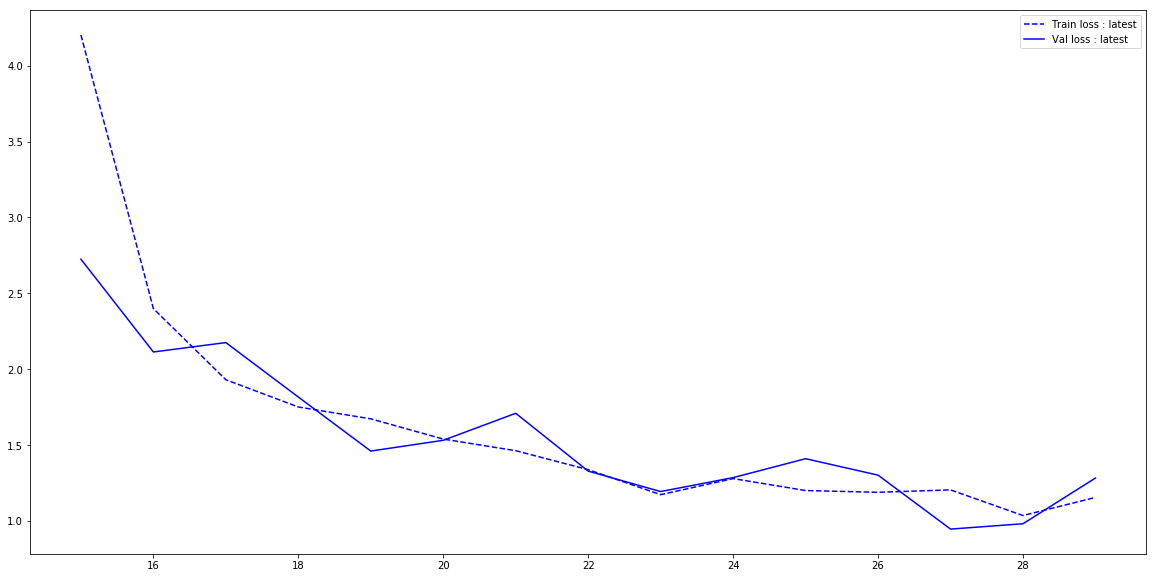

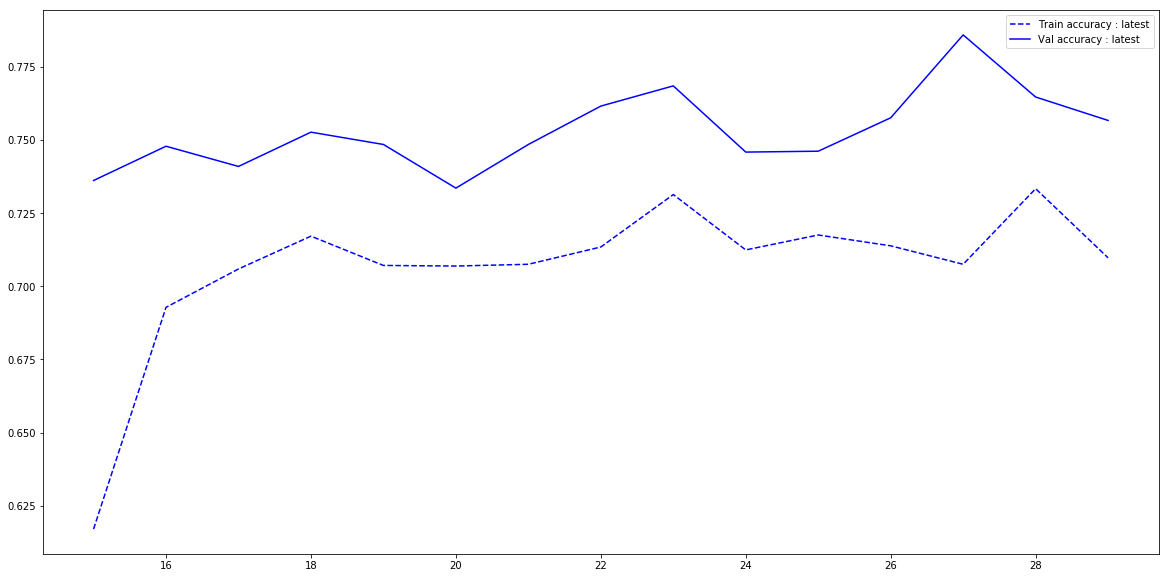

In [122]:
make_graphs('latest', 15, 1000)

In [80]:
len(histories['resnet101_1000']['train_losses'])

1000

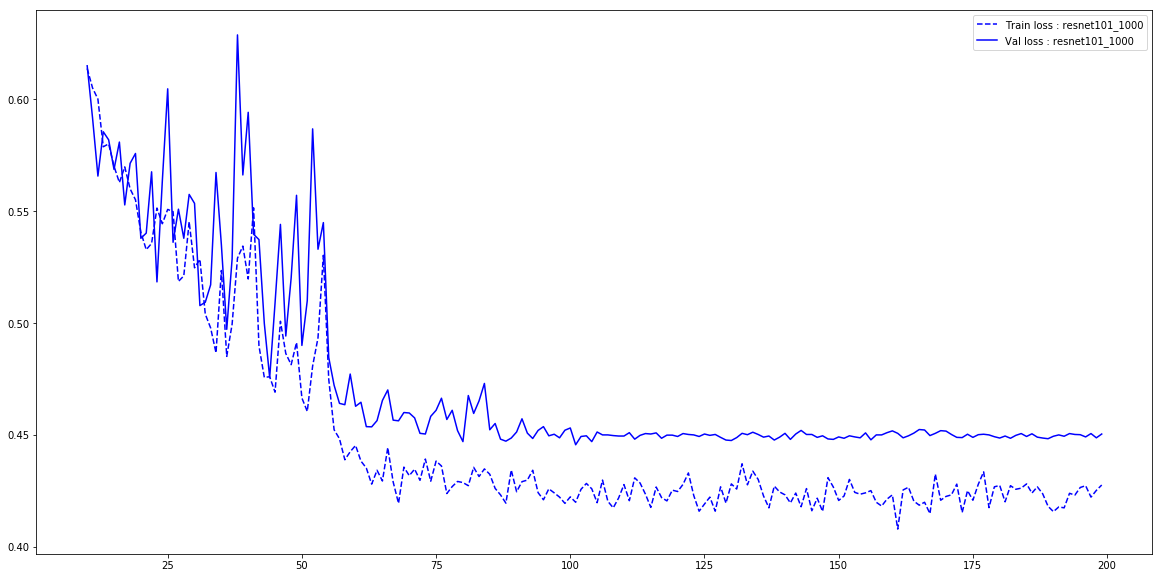

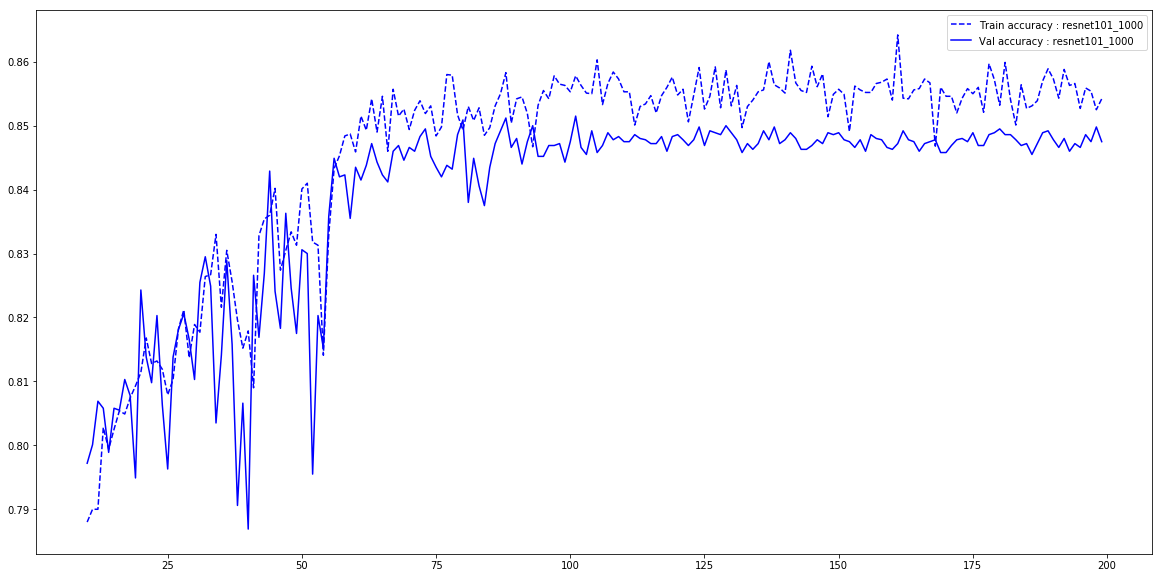

In [131]:
make_graphs('resnet101_1000', 10, 200)

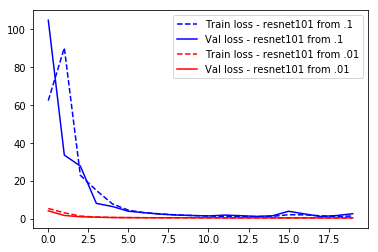

In [35]:
train_losses_1 = histories['resnet101_decay_1']['train_losses']
val_losses_1 = histories['resnet101_decay_1']['val_losses']
train_losses_2 = histories['resnet101_decay_2']['train_losses']
val_losses_2 = histories['resnet101_decay_2']['val_losses']

#n = len(train_losses_1)
n=20
n_to_skip = 0

plt.plot(range(n_to_skip,n), train_losses_1[n_to_skip:n], 'b--', label='Train loss - resnet101 from .1')
plt.plot(range(n_to_skip,n), val_losses_1[n_to_skip:n], 'b', label='Val loss - resnet101 from .1')
plt.plot(range(n_to_skip,n), train_losses_2[n_to_skip:n],'r--', label='Train loss - resnet101 from .01')
plt.plot(range(n_to_skip,n), val_losses_2[n_to_skip:n], 'r', label='Val loss - resnet101 from .01')
plt.legend()
plt.show()

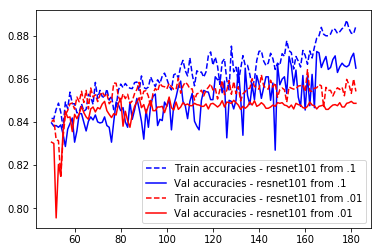

In [41]:
train_losses_1 = histories['resnet101_decay_1']['train_accuracies']
val_losses_1 = histories['resnet101_decay_1']['val_accuracies']
train_losses_2 = histories['resnet101_decay_2']['train_accuracies']
val_losses_2 = histories['resnet101_decay_2']['val_accuracies']

n = len(train_losses_1)
n_to_skip = 50

plt.plot(range(n_to_skip,n), train_losses_1[n_to_skip:n], 'b--', label='Train accuracies - resnet101 from .1')
plt.plot(range(n_to_skip,n), val_losses_1[n_to_skip:n], 'b', label='Val accuracies - resnet101 from .1')
plt.plot(range(n_to_skip,n), train_losses_2[n_to_skip:n],'r--', label='Train accuracies - resnet101 from .01')
plt.plot(range(n_to_skip,n), val_losses_2[n_to_skip:n], 'r', label='Val accuracies - resnet101 from .01')
plt.legend()
plt.show()

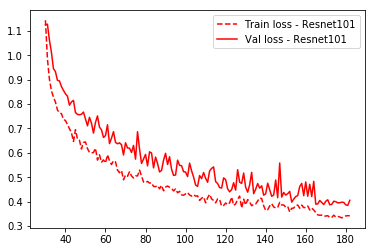

In [16]:
train_losses_50 = histories['resnet50']['train_losses']
val_losses_50 = histories['resnet50']['val_losses']
train_losses_101 = histories['resnet101']['train_losses']
val_losses_101 = histories['resnet101']['val_losses']

n = len(train_losses_101)
n_to_skip = 30

#plt.plot(range(n_to_skip,n), train_losses_50[n_to_skip:n], 'b--', label='Train loss - Resnet50')
#plt.plot(range(n_to_skip,n), val_losses_50[n_to_skip:n], 'b', label='Val loss - Resnet50')
plt.plot(range(n_to_skip,n), train_losses_101[n_to_skip:n],'r--', label='Train loss - Resnet101')
plt.plot(range(n_to_skip,n), val_losses_101[n_to_skip:n], 'r', label='Val loss - Resnet101')
plt.legend()
plt.show()

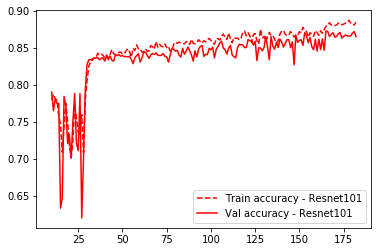

In [15]:
train_accuracies_50 = histories['resnet50']['train_accuracies']
val_accuracies_50 = histories['resnet50']['val_accuracies']
train_accuracies_101 = histories['resnet101']['train_accuracies']
val_accuracies_101 = histories['resnet101']['val_accuracies']

n = len(train_accuracies_101)
n_to_skip = 10

#plt.plot(range(n_to_skip,n), train_accuracies_50[n_to_skip:n], 'b--', label='Train accuracy - Resnet50')
#plt.plot(range(n_to_skip,n), val_accuracies_50[n_to_skip:n], 'b', label='Val accuracy - Resnet50')
plt.plot(range(n_to_skip,n), train_accuracies_101[n_to_skip:n],'r--', label='Train accuracy - Resnet101')
plt.plot(range(n_to_skip,n), val_accuracies_101[n_to_skip:n], 'r', label='Val accuracy - Resnet101')
plt.legend()
plt.show()